# Percepción Computacional
## Caso grupal 1:  Implementación de un filtro espacial o morfológico
##### Albert Fernandez Lozano
##### Ander Lanas Alocén
##### Emili Bota Batlle
##### María de la Cruz Ramírez Trujillo
##### Olatz Urrutia Etxebarria
v. 28.01.2020 - 18:00:00

#### Objetivos
El objetivo de este trabajo grupal es desarrollar un filtro morfológico https://www5.cs.fau.de/research/data/fundus-images/

In [41]:
#imports
from skimage import data,io,exposure
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing, black_tophat, white_tophat
from skimage.morphology import disk, diamond, ball, rectangle
from skimage.filters import gaussian, median,inverse
import matplotlib.pyplot as plt
import numpy as np
import time

In [38]:
#Definición de funciones generales
def isGray(img):
    """Decide si una imagen es gris o multicolor (RGB)
    Parameters:
    img (numpy.array): Imagen en formato array de numpy
    Returns:
    boolean:Returning value
    """
    return np.isscalar(img[0][0])

def viewImg(img):
    """Permite visualizar una imagen
    Parameters:
    img (numpy.array): Imagen en formato array de numpy   
    """
    is_gray = isGray(img)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.imshow(img,cmap=(plt.cm.gray if is_gray else None))
    ax1.set_xticks([]), ax1.set_yticks([])
    if (is_gray):
        ax2.hist(img.ravel(), bins=256)
    else:
        ax2.hist(img[:,:,0].ravel(), bins=256, color='red', alpha=0.5)
        ax2.hist(img[:,:,1].ravel(), bins=256, color='green', alpha=0.5)
        ax2.hist(img[:,:,2].ravel(), bins=256, color='blue', alpha=0.5)
    plt.show()

#función sacada de la magistral "Morfologia matematica"
def plot_comp(original,filtered,filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Imagen Original')
    ax1.axis('off')
    ax1.set_adjustable('box')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box')
    plt.show()

In [39]:
#Importamos la/s imagen/es que queremos utilizar
images = [[]]
print('Start loading images...')
for i in np.arange(1,2):
    images.append(io.imread(f'retinopatia_diabetica/{i:02d}_dr.JPG'))
print('All images loaded!')

Start loading images...
All images loaded!


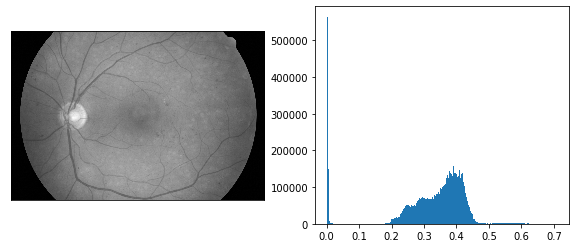

In [40]:
ojo = rgb2gray(images[1])
viewImg(ojo)

In [43]:
start = time.time()
ee = disk(10)
d = dilation(ojo,ee)
e = erosion(ojo,ee)
o = opening(ojo,ee)
c = closing(ojo,ee)
wth = white_tophat(ojo,ee)
bth = black_tophat(ojo,ee)
end = time.time()
print(f'Finished in {end-start}s')

Finished in $46.34439992904663s


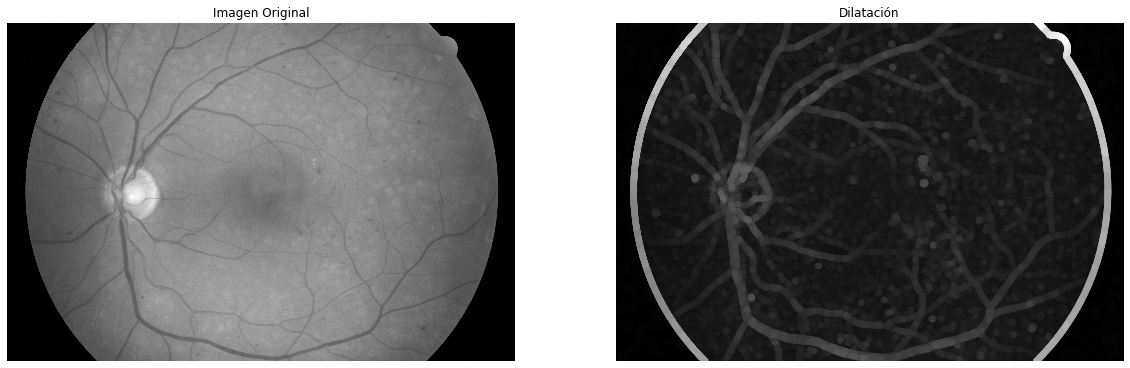

In [47]:
plot_comp(ojo, dilation(np.zeros(ojo.shape) - (ojo - d),disk(20)),'Dilatación')

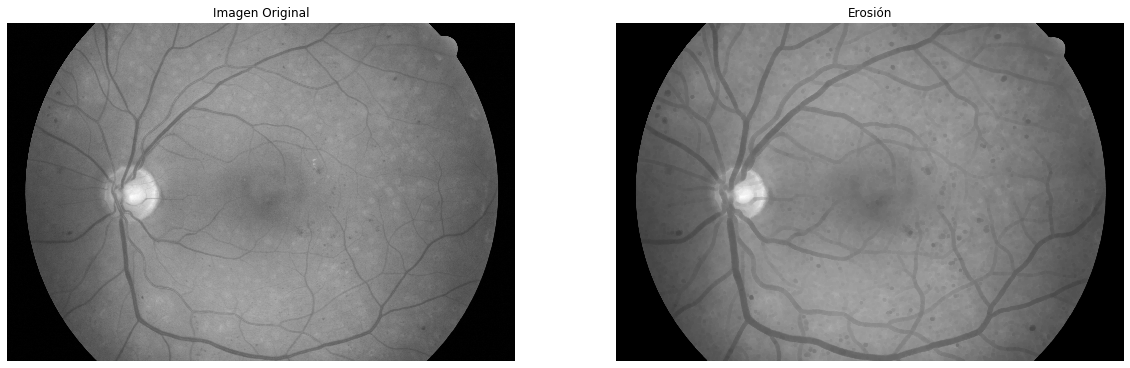

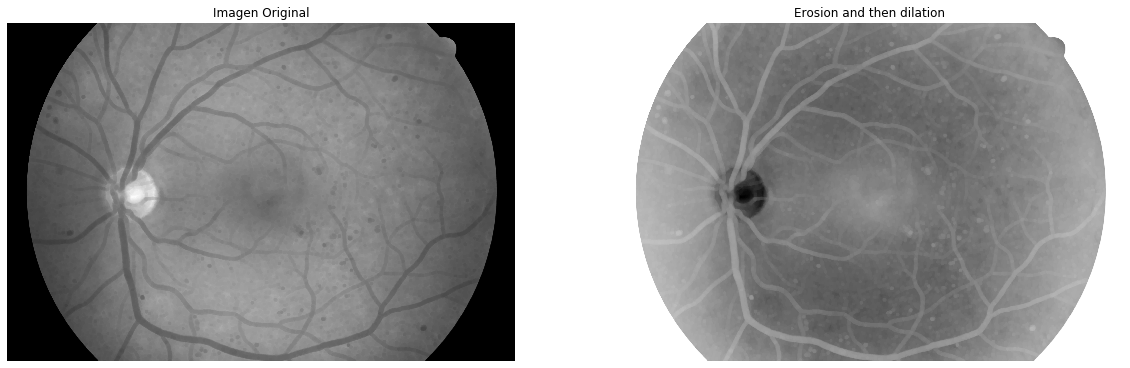

In [33]:
plot_comp(ojo, e,'Erosión')
plot_comp(e, closing(np.zeros(e.shape) - e,rectangle(10,4)),'Erosion and then dilation')

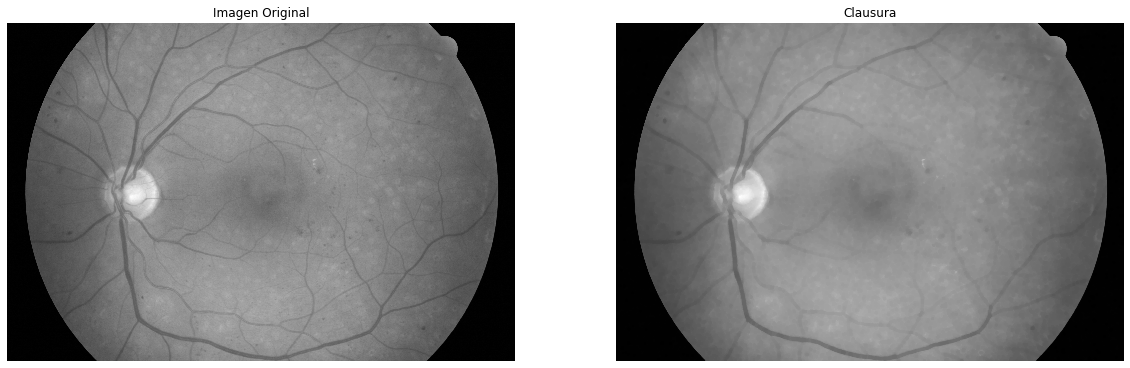

In [61]:
plot_comp(ojo,c,'Clausura')

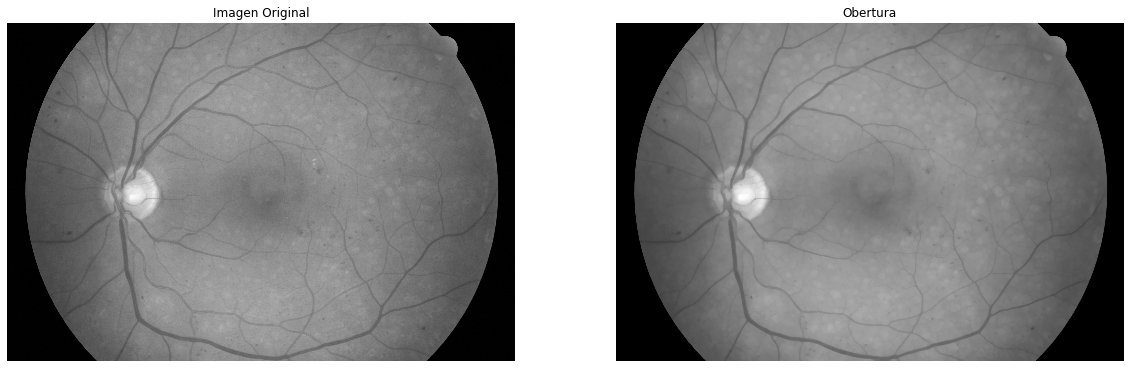

In [23]:
plot_comp(ojo,o,'Obertura')

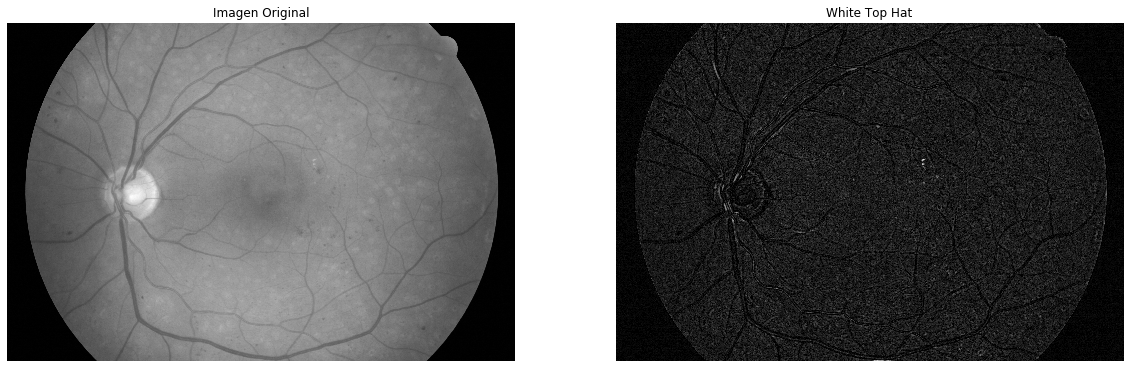

In [24]:
plot_comp(ojo,wth,'White Top Hat')

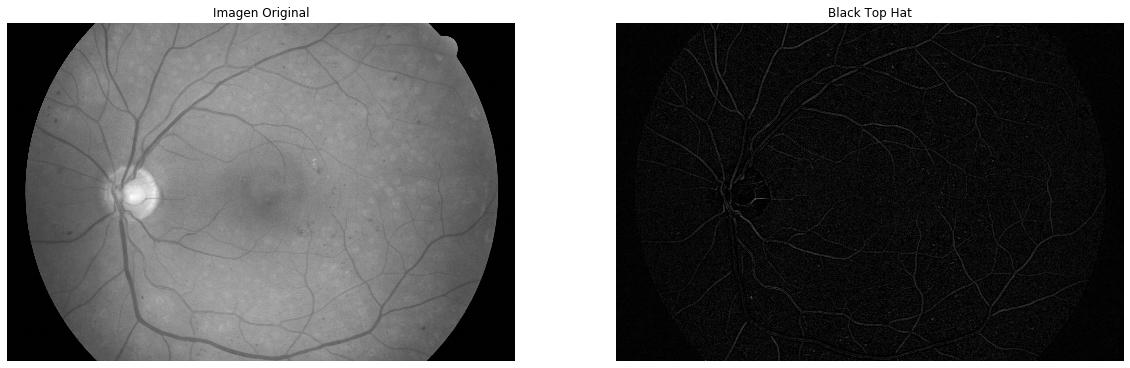

In [51]:
plot_comp(ojo, bth,'Black Top Hat')

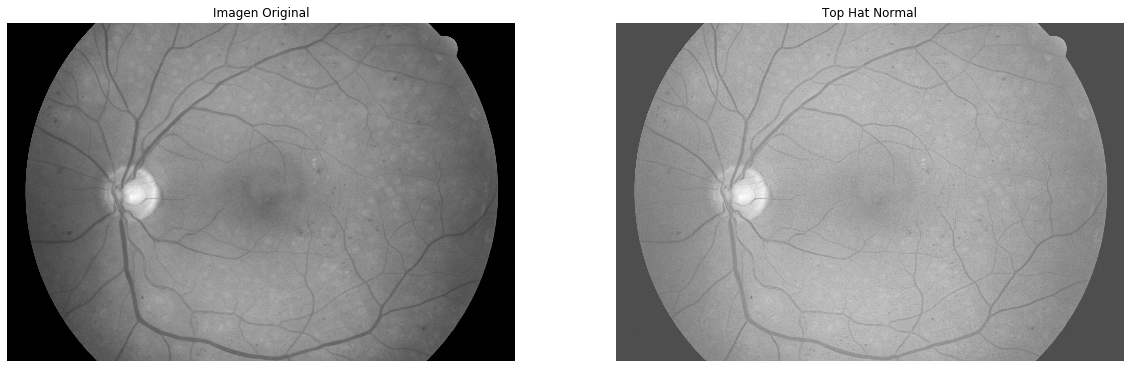

In [28]:
plot_comp(ojo, (np.zeros(ojo.shape) - bth) + ojo ,'Top Hat Normal')

In [62]:
crossrect = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                      [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
                      [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                      [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
                      [0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
                      [0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                      [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                      [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                      [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype='uint8')